In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
### Import packages
from skimage.io import imread
from glob import glob
import IPython.display
import PIL.Image

import math
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from skimage.io import imread
from skimage.measure import block_reduce
from sklearn.metrics import roc_auc_score

from tensorflow.python.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.python.keras.models import Sequential, model_from_json
from tensorflow.python.keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation, SeparableConv2D
from keras.layers import Conv2D, MaxPool2D
from keras.optimizers import RMSprop, Adam
from tensorflow.python.lib.io import file_io
import cv2

from sklearn import *

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
import numpy as np 
import keras
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau

from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


In [0]:
X_train = np.load('/content/drive/My Drive/Christina-Myrto/Big Data Content Analytics/Input/X_train_array.npy')
X_val = np.load('/content/drive/My Drive/Christina-Myrto/Big Data Content Analytics/Input/X_val_array.npy')
X_test = np.load('/content/drive/My Drive/Christina-Myrto/Big Data Content Analytics/Input/X_test_array.npy')

y_train = np.load('/content/drive/My Drive/Christina-Myrto/Big Data Content Analytics/Input/y_train_array.npy')
y_val = np.load('/content/drive/My Drive/Christina-Myrto/Big Data Content Analytics/Input/y_val_array.npy')
y_test = np.load('/content/drive/My Drive/Christina-Myrto/Big Data Content Analytics/Input/y_test_array.npy')

W0828 17:51:07.936896 139784471828352 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0828 17:51:08.029098 139784471828352 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0828 17:51:08.060090 139784471828352 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0828 17:51:08.146315 139784471828352 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0828 17:51:08.163730 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 16)        448       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 16)        2320      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 26, 16)        2320      
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 32)        4640      
__________

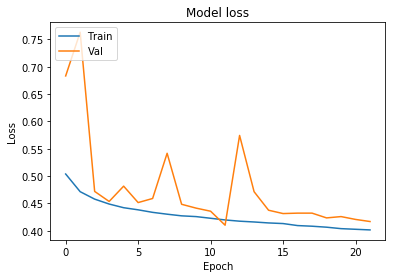

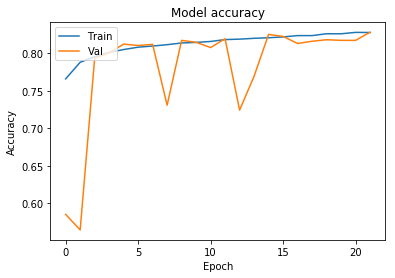

Accuracy: 0.826166
Precision: 0.868307
Recall: 0.673401
F1 score: 0.758534
Cohens kappa: 0.626096
ROC AUC: 0.902497
Confusion matrix:
[[12155   910]
 [ 2910  6000]]


In [0]:
# Model 1
model = Sequential()
model.add(Conv2D(16, (3, 3), input_shape=(32,32,3), activation = 'relu'))
model.add(Conv2D(16, (3, 3), activation = 'relu'))
model.add(Conv2D(16, (3, 3)))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(64, (3, 3)))
# model.add(Conv2D(64, (3, 3)))
# model.add(Conv2D(64, (3, 3)))
# model.add(Activation('relu'))
# model.add(Dropout(0.25))
# model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid')) # sigmoid activation 

## Compile model
model.compile(loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

# print model layers' info
print(model.summary())

# Define callbacks
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
reduce_lr = ReduceLROnPlateau(monitor='val_acc', mode='max', factor=0.2, patience=5, verbose=1, min_lr=0.001)
mc = ModelCheckpoint('best_model1.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

# Train the model
m = model.fit(
    X_train,            # features (as dense inputs)
    y_train,            # labels
    epochs=500,         # number of epochs
    batch_size=32,      # define batch size
    verbose=1,          # the most extended verbose
    validation_data=(       
        X_val,          # the validation split that we did before
        y_val
    ),
    callbacks=[es, mc, reduce_lr]
    )

################################################################################
## Plot Loss & Accuracy Curves
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

################################################################################
# Demonstration of calculating metrics for a neural network model using sklearn
# predict probabilities for test set
yhat_probs = model.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = model.predict_classes(X_test, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]
 
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print('Confusion matrix:')
print(matrix)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
activation_5 (Activation)    (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 30, 30, 32)        4640      
_________________________________________________________________
activation_6 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 15, 15, 64)        18496     
__________

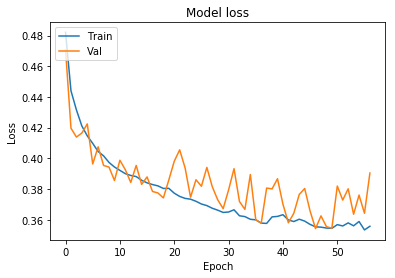

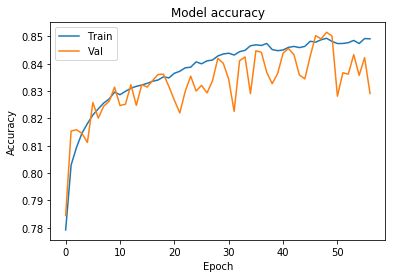

Accuracy: 0.831809
Precision: 0.785292
Recall: 0.805387
F1 score: 0.795213
Cohens kappa: 0.652560
ROC AUC: 0.906763
Confusion matrix:
[[11103  1962]
 [ 1734  7176]]


In [0]:
# Model 2
model = Sequential()
model.add(Conv2D(16, (3, 3), padding='same', input_shape=(32,32,3)))
model.add(Activation('relu'))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# adding last layers - flattening and Dence
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

## Compile model
model.compile(loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

# print model layers' info
print(model.summary())

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
reduce_lr = ReduceLROnPlateau(monitor='val_acc', mode='max', factor=0.2, patience=5, verbose=1, min_lr=0.001)
mc = ModelCheckpoint('best_model2.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

# Train the model
m = model.fit(
    X_train,            # features (as dense inputs)
    y_train,            # labels
    epochs=500,         # number of epochs
    batch_size=32,      # define batch size
    verbose=1,          # the most extended verbose
    validation_data=(       
        X_val,          # the validation split that we did before
        y_val
    ),
    callbacks=[es, mc, reduce_lr]
    )

################################################################################
## Plot Loss & Accuracy Curves
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

################################################################################
# Demonstration of calculating metrics for a neural network model using sklearn
# predict probabilities for test set
yhat_probs = model.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = model.predict_classes(X_test, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]
 
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print('Confusion matrix:')
print(matrix)

W0828 19:40:39.164745 139784471828352 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_10 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 30, 30, 64)        18496     
_________________________________________________________________
activation_11 (Activation)   (None, 30, 30, 64)        0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 30, 30, 64)        256       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 15, 15, 64)        0         
__________

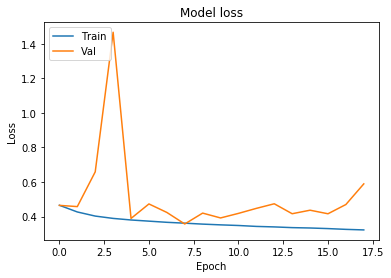

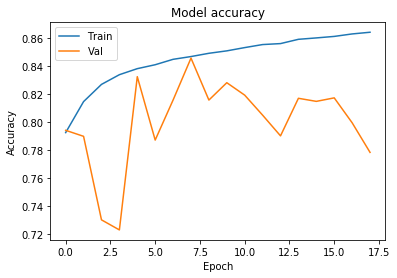

Accuracy: 0.776928
Precision: 0.867167
Recall: 0.531201
F1 score: 0.658825
Cohens kappa: 0.506940
ROC AUC: 0.843649
Confusion matrix:
[[12340   725]
 [ 4177  4733]]


In [0]:
# Model 2c
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(32,32,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# model.add(Conv2D(128, (3, 3), padding='same'))
# model.add(Activation('relu'))
# model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# adding last layers - flattening and Dence
model.add(Flatten())
model.add(Dense(64))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

## Compile model
model.compile(loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

# print model layers' info
print(model.summary())

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
reduce_lr = ReduceLROnPlateau(monitor='val_acc', mode='max', factor=0.2, patience=5, verbose=1, min_lr=0.001)
mc = ModelCheckpoint('best_model2c.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

# Train the model
m = model.fit(
    X_train,            # features (as dense inputs)
    y_train,            # labels
    epochs=500,         # number of epochs
    batch_size=32,      # define batch size
    verbose=1,          # the most extended verbose
    validation_data=(       
        X_val,          # the validation split that we did before
        y_val
    ),
    callbacks=[es, mc, reduce_lr]
    )

################################################################################
## Plot Loss & Accuracy Curves
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

################################################################################
# Demonstration of calculating metrics for a neural network model using sklearn
# predict probabilities for test set
yhat_probs = model.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = model.predict_classes(X_test, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]
 
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print('Confusion matrix:')
print(matrix)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 32, 32, 16)        2320      
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 32, 32, 16)        2320      
_________________________________________________________________
dropout_10 (Dropout)         (None, 32, 32, 16)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 10, 10, 16)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 10, 10, 32)        4640      
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 10, 10, 32)        9248      
__________

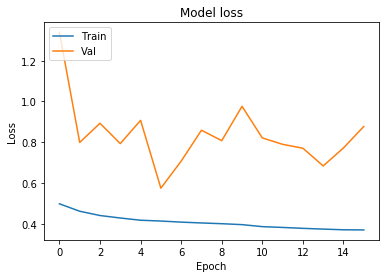

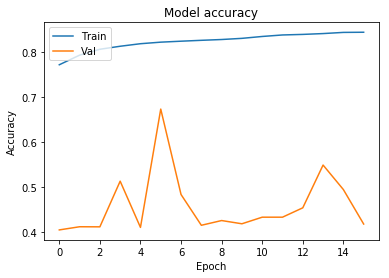

Accuracy: 0.417429
Precision: 0.410347
Recall: 0.999663
F1 score: 0.581853
Cohens kappa: 0.016301
ROC AUC: 0.918452
Confusion matrix:
[[  266 12799]
 [    3  8907]]


In [0]:
# Model 3
model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = (32, 32, 3)))
model.add(Conv2D(filters = 16, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 16, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size = 3)) 

model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu')) 
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu')) 
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size = 3)) 

model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size = 3))

model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 256, kernel_size = 3, padding = 'same', activation = 'relu'))

# adding last layers - flattening and Dence
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

## Compile model
model.compile(loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

# print model layers' info
print(model.summary())

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
reduce_lr = ReduceLROnPlateau(monitor='val_acc', mode='max', factor=0.2, patience=5, verbose=1, min_lr=0.001)
mc = ModelCheckpoint('best_model3.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

# Train the model
m = model.fit(
    X_train,            # features (as dense inputs)
    y_train,            # labels
    epochs=500,         # number of epochs
    batch_size=32,      # define batch size
    verbose=1,          # the most extended verbose
    validation_data=(       
        X_val,          # the validation split that we did before
        y_val
    ),
    callbacks=[es, mc, reduce_lr]
    )

################################################################################
## Plot Loss & Accuracy Curves
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

################################################################################
# Demonstration of calculating metrics for a neural network model using sklearn
# predict probabilities for test set
yhat_probs = model.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = model.predict_classes(X_test, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]
 
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print('Confusion matrix:')
print(matrix)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 32, 32, 16)        2320      
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 32, 32, 16)        2320      
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 16)        64        
_________________________________________________________________
dropout_14 (Dropout)         (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 32, 32, 32)        4640      
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 32, 32, 32)        9248      
__________

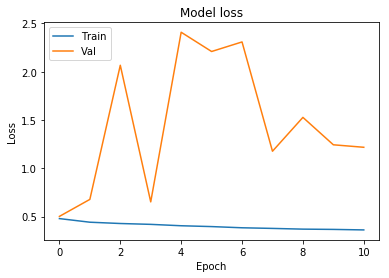

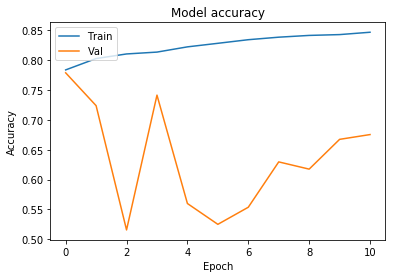

Accuracy: 0.676542
Precision: 0.558966
Recall: 0.958586
F1 score: 0.706160
Cohens kappa: 0.397582
ROC AUC: 0.901283
Confusion matrix:
[[6326 6739]
 [ 369 8541]]


In [0]:
# Model 4
model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = (32, 32, 3)))
model.add(Conv2D(filters = 16, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 16, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))  

model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(BatchNormalization())

model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size = 2)) 

model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(BatchNormalization())

# adding last layers - flattening and Dence
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

## Compile model
model.compile(loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

# print model layers' info
print(model.summary())

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
reduce_lr = ReduceLROnPlateau(monitor='val_acc', mode='max', factor=0.2, patience=5, verbose=1, min_lr=0.001)
mc = ModelCheckpoint('best_model4.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

# Train the model
m = model.fit(
    X_train,            # features (as dense inputs)
    y_train,            # labels
    epochs=500,         # number of epochs
    batch_size=32,      # define batch size
    verbose=1,          # the most extended verbose
    validation_data=(       
        X_val,          # the validation split that we did before
        y_val
    ),
    callbacks=[es, mc, reduce_lr]
    )

################################################################################
## Plot Loss & Accuracy Curves
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

################################################################################
# Demonstration of calculating metrics for a neural network model using sklearn
# predict probabilities for test set
yhat_probs = model.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = model.predict_classes(X_test, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]
 
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print('Confusion matrix:')
print(matrix)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_44 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization_19 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_20 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 26, 26, 32)        9248      
_________________________________________________________________
batch_normalization_21 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
dropout_20 (Dropout)         (None, 26, 26, 32)        0         
__________

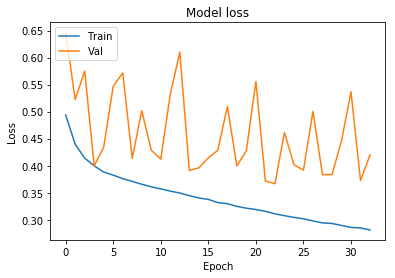

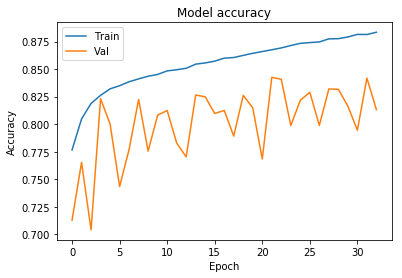

Loss = 0.416480
Accuracy: 0.814334
Precision: 0.756533
Recall: 0.799327
F1 score: 0.777341
Cohens kappa: 0.618334
ROC AUC: 0.893295
Confusion matrix:
[[10773  2292]
 [ 1788  7122]]


In [0]:
# Model 5
model = Sequential()
# model.add(Conv2D(filters = 16, kernel_size = 3, activation = 'relu', input_shape = (32, 32, 3)))
# model.add(Conv2D(filters = 16, kernel_size = 3, activation = 'relu'))
# model.add(BatchNormalization())
# model.add(Conv2D(filters = 16, kernel_size = 3, activation = 'relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.25))
# model.add(MaxPooling2D(pool_size = 2)) 

model.add(Conv2D(filters = 32, kernel_size = 3, activation = 'relu', input_shape = (32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(filters = 32, kernel_size = 3, activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 32, kernel_size = 3, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size = 2)) 

model.add(Conv2D(filters = 64, kernel_size = 3, activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 64, kernel_size = 3, activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 64, kernel_size = 3, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size = 2)) 

# model.add(Conv2D(filters = 128, kernel_size = 3, activation = 'relu'))
# model.add(BatchNormalization())
# model.add(Conv2D(filters = 128, kernel_size = 3, activation = 'relu'))
# model.add(BatchNormalization())
# model.add(Conv2D(filters = 128, kernel_size = 3, activation = 'relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.25))
# model.add(MaxPooling2D(pool_size = 2)) 

# adding last layers - flattening and Dence
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

## Compile model
model.compile(loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

# print model layers' info
print(model.summary())

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
reduce_lr = ReduceLROnPlateau(monitor='val_acc', mode='max', factor=0.2, patience=5, verbose=1, min_lr=0.001)
mc = ModelCheckpoint('best_model5.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

# Train the model
m = model.fit(
    X_train,            # features (as dense inputs)
    y_train,            # labels
    epochs=500,         # number of epochs
    batch_size=32,      # define batch size
    verbose=1,          # the most extended verbose
    validation_data=(       
        X_val,          # the validation split that we did before
        y_val
    ),
    callbacks=[es, mc, reduce_lr]
    )

################################################################################
## Plot Loss & Accuracy Curves
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

################################################################################
# Demonstration of calculating metrics for a neural network model using sklearn
# predict probabilities for test set
yhat_probs = model.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = model.predict_classes(X_test, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]

# evaluate model
Loss,_ = model.evaluate(X_test, y_test, verbose=0)
print('Loss = %.6f' % Loss)
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print('Confusion matrix:')
print(matrix)



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_50 (Conv2D)           (None, 30, 30, 128)       3584      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 15, 15, 128)       0         
_________________________________________________________________
dropout_23 (Dropout)         (None, 15, 15, 128)       0         
_________________________________________________________________
batch_normalization_26 (Batc (None, 15, 15, 128)       512       
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 13, 13, 32)        36896     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 6, 6, 32)          0         
__________

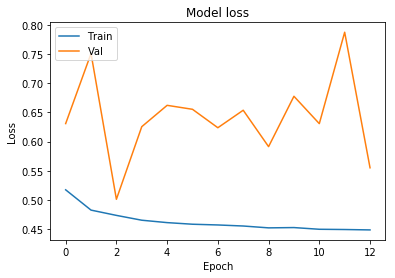

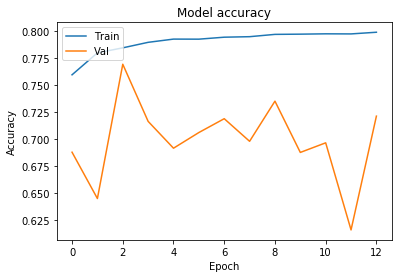

Loss = 0.548999
Accuracy: 0.727554
Precision: 0.610896
Recall: 0.903591
F1 score: 0.728960
Cohens kappa: 0.474910
ROC AUC: 0.873197
Confusion matrix:
[[7937 5128]
 [ 859 8051]]


In [0]:
# Model 6
model = Sequential()
model.add(Conv2D(filters = 128, kernel_size = 3, activation = 'relu', input_shape = (32, 32, 3)))
model.add(MaxPooling2D(pool_size = 2)) 
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Conv2D(filters = 32, kernel_size = 3, activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2)) 
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Conv2D(filters = 64, kernel_size = 3, activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2)) 
model.add(Dropout(0.3))
model.add(BatchNormalization())

# adding last layers - flattening and Dence
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

## Compile model
model.compile(loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

# print model layers' info
print(model.summary())

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
reduce_lr = ReduceLROnPlateau(monitor='val_acc', mode='max', factor=0.2, patience=5, verbose=1, min_lr=0.001)
mc = ModelCheckpoint('best_model6.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

# Train the model
m = model.fit(
    X_train,            # features (as dense inputs)
    y_train,            # labels
    epochs=500,         # number of epochs
    batch_size=32,      # define batch size
    verbose=1,          # the most extended verbose
    validation_data=(       
        X_val,          # the validation split that we did before
        y_val
    ),
    callbacks=[es, mc, reduce_lr]
    )

################################################################################
## Plot Loss & Accuracy Curves
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

################################################################################
# Demonstration of calculating metrics for a neural network model using sklearn
# predict probabilities for test set
yhat_probs = model.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = model.predict_classes(X_test, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]

# evaluate model
Loss,_ = model.evaluate(X_test, y_test, verbose=0)
print('Loss = %.6f' % Loss)
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print('Confusion matrix:')
print(matrix)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_53 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_27 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 6, 6, 64)          0         
__________

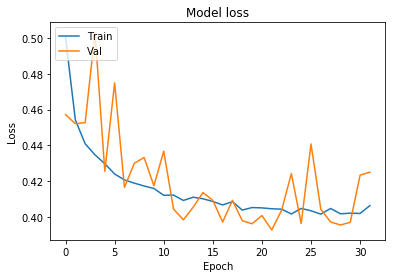

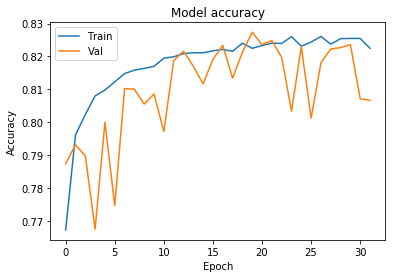

Loss = 0.421196
Accuracy: 0.808919
Precision: 0.734401
Recall: 0.828283
F1 score: 0.778522
Cohens kappa: 0.611565
ROC AUC: 0.893535
Confusion matrix:
[[10396  2669]
 [ 1530  7380]]


In [0]:
# Model  7
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
  
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
  
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
  
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

## Compile model
model.compile(loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

# print model layers' info
print(model.summary())

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
reduce_lr = ReduceLROnPlateau(monitor='val_acc', mode='max', factor=0.2, patience=5, verbose=1, min_lr=0.001)
mc = ModelCheckpoint('best_model7.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

# Train the model
m = model.fit(
    X_train,            # features (as dense inputs)
    y_train,            # labels
    epochs=500,         # number of epochs
    batch_size=32,      # define batch size
    verbose=1,          # the most extended verbose
    validation_data=(       
        X_val,          # the validation split that we did before
        y_val
    ),
    callbacks=[es, mc, reduce_lr]
    )

################################################################################
## Plot Loss & Accuracy Curves
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

################################################################################
# Demonstration of calculating metrics for a neural network model using sklearn
# predict probabilities for test set
yhat_probs = model.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = model.predict_classes(X_test, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]

# evaluate model
Loss,_ = model.evaluate(X_test, y_test, verbose=0)
print('Loss = %.6f' % Loss)
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print('Confusion matrix:')
print(matrix)

W0829 10:01:38.411700 140689841866624 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0829 10:01:38.499245 140689841866624 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0829 10:01:38.519379 140689841866624 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0829 10:01:38.586048 140689841866624 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0829 10:01:38.587195 1406898418

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_1 (Separabl (None, 32, 32, 32)        155       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
separable_conv2d_2 (Separabl (None, 16, 16, 64)        2400      
_________________________________________________________________
activation_2 (Activation)    (None, 16, 16, 64)        0         
__________

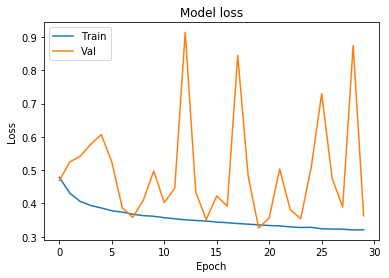

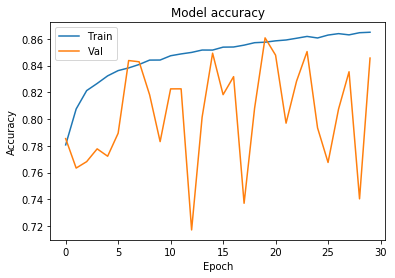

Loss = 0.353190
Accuracy: 0.848783
Precision: 0.790778
Recall: 0.852637
F1 score: 0.820543
Cohens kappa: 0.690206
ROC AUC: 0.926759
Confusion matrix:
[[11055  2010]
 [ 1313  7597]]


In [0]:
# Model 8

model = Sequential()
chanDim = -1
        
# CONV => RELU => POOL
model.add(SeparableConv2D(32, (3, 3), padding="same", input_shape=(32, 32, 3)))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# (CONV => RELU => POOL) * 2
model.add(SeparableConv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(SeparableConv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# (CONV => RELU => POOL) * 3
model.add(SeparableConv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(SeparableConv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(SeparableConv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
        
# first (and only) set of FC => RELU layers
model.add(Flatten())
model.add(Dense(256))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# sigmoid classifier
model.add(Dense(1))
model.add(Activation("sigmoid"))
        
## Compile model
model.compile(loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

# print model layers' info
print(model.summary())

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
reduce_lr = ReduceLROnPlateau(monitor='val_acc', mode='max', factor=0.2, patience=5, verbose=1, min_lr=0.001)
mc = ModelCheckpoint('best_model8.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

# Train the model
m = model.fit(
    X_train,            # features (as dense inputs)
    y_train,            # labels
    epochs=500,         # number of epochs
    batch_size=32,      # define batch size
    verbose=1,          # the most extended verbose
    validation_data=(       
        X_val,          # the validation split that we did before
        y_val
    ),
    callbacks=[es, mc, reduce_lr]
    )

################################################################################
## Plot Loss & Accuracy Curves
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

################################################################################
# Demonstration of calculating metrics for a neural network model using sklearn
# predict probabilities for test set
yhat_probs = model.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = model.predict_classes(X_test, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]
 
# evaluate model
Loss,_ = model.evaluate(X_test, y_test, verbose=0)
print('Loss = %.6f' % Loss)
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print('Confusion matrix:')
print(matrix)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
activation_9 (Activation)    (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
activation_10 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_11 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
__________

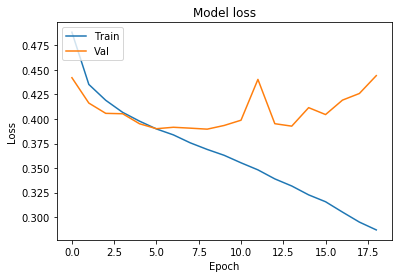

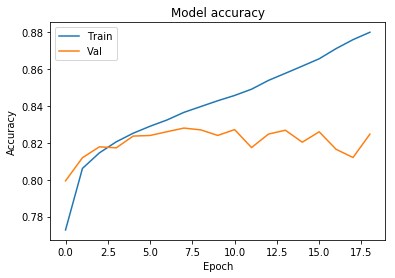

Loss = 0.446839
Accuracy: 0.825711
Precision: 0.820545
Recall: 0.729742
F1 score: 0.772484
Cohens kappa: 0.632023
ROC AUC: 0.888157
Confusion matrix:
[[11643  1422]
 [ 2408  6502]]


In [0]:
# Model 9 (without dropout and batch normalization)
model = Sequential()
model.add(Conv2D(16, (3, 3), padding='same', input_shape=(32,32,3)))
model.add(Activation('relu'))

model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
#model.add(BatchNormalization())

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
# model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.2))

# adding last layers - flattening and Dence
model.add(Flatten())
model.add(Dense(128))
#model.add(BatchNormalization())
model.add(Activation('relu'))
#model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

## Compile model
model.compile(loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

# print model layers' info
print(model.summary())

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
reduce_lr = ReduceLROnPlateau(monitor='val_acc', mode='max', factor=0.2, patience=5, verbose=1, min_lr=0.001)
mc = ModelCheckpoint('best_model9.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

# Train the model
m = model.fit(
    X_train,            # features (as dense inputs)
    y_train,            # labels
    epochs=500,         # number of epochs
    batch_size=32,      # define batch size
    verbose=1,          # the most extended verbose
    validation_data=(       
        X_val,          # the validation split that we did before
        y_val
    ),
    callbacks=[es, mc, reduce_lr]
    )

################################################################################
## Plot Loss & Accuracy Curves
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

################################################################################
# Demonstration of calculating metrics for a neural network model using sklearn
# predict probabilities for test set
yhat_probs = model.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = model.predict_classes(X_test, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]

# evaluate model
Loss,_ = model.evaluate(X_test, y_test, verbose=0)
print('Loss = %.6f' % Loss)
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print('Confusion matrix:')
print(matrix)

W0830 13:43:21.959602 140004494276480 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0830 13:43:22.043892 140004494276480 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0830 13:43:22.064110 140004494276480 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0830 13:43:22.148724 140004494276480 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4267: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0830 13:43:22.153995 140004494276480 deprecation_wrapp

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 16)        2320      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 30, 30, 32)        4640      
_________________________________________________________________
activation_3 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 32)       

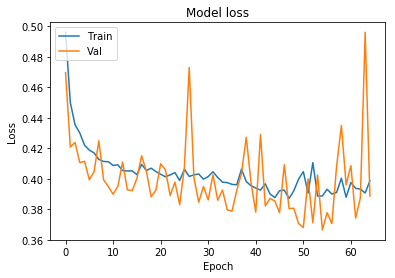

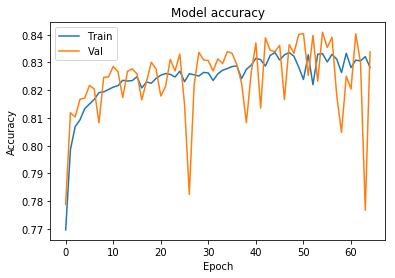

Loss = 0.387225
Accuracy: 0.832673
Precision: 0.813391
Recall: 0.762177
F1 score: 0.786952
Cohens kappa: 0.649429
ROC AUC: 0.901865
Confusion matrix:
[[11507  1558]
 [ 2119  6791]]


In [4]:
# Model 10a
model = Sequential()
model.add(Conv2D(16, (3, 3), padding='same', input_shape=(32,32,3)))
model.add(Activation('relu'))
model.add(Conv2D(16, (3, 3)))
model.add(Activation('relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
# model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# adding last layers - flattening and Dence
model.add(Flatten())
model.add(Dense(512))
# model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

## Compile model
model.compile(loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

# print model layers' info
print(model.summary())

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
reduce_lr = ReduceLROnPlateau(monitor='val_acc', mode='max', factor=0.2, patience=5, verbose=1, min_lr=0.001)
mc = ModelCheckpoint('best_model10a.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

# Train the model
m = model.fit(
    X_train,            # features (as dense inputs)
    y_train,            # labels
    epochs=500,         # number of epochs
    batch_size=32,      # define batch size
    verbose=1,          # the most extended verbose
    validation_data=(       
        X_val,          # the validation split that we did before
        y_val
    ),
    callbacks=[es, mc, reduce_lr]
    )

################################################################################
## Plot Loss & Accuracy Curves
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

################################################################################
# Demonstration of calculating metrics for a neural network model using sklearn
# predict probabilities for test set
yhat_probs = model.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = model.predict_classes(X_test, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]

# evaluate model
Loss,_ = model.evaluate(X_test, y_test, verbose=0)
print('Loss = %.6f' % Loss)
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print('Confusion matrix:')
print(matrix)

W0829 17:04:14.085715 140118259308416 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0829 17:04:14.461560 140118259308416 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0829 17:04:14.477851 140118259308416 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0829 17:04:14.561898 140118259308416 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4267: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0829 17:04:14.672946 140118259308416 deprecation_wrapp

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 16)        2320      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 30, 30, 32)        4640      
_________________________________________________________________
activation_3 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 32)       

W0829 17:04:15.116524 140118259308416 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 158220 samples, validate on 39555 samples
Epoch 1/500
158220/158220 [==============================] - 65s 413us/step - loss: 0.5648 - acc: 0.6863 - val_loss: 0.4816 - val_acc: 0.7750

Epoch 00001: val_acc improved from -inf to 0.77497, saving model to best_model10b.h5
Epoch 2/500
158220/158220 [==============================] - 58s 365us/step - loss: 0.4576 - acc: 0.7931 - val_loss: 0.4609 - val_acc: 0.7885

Epoch 00002: val_acc improved from 0.77497 to 0.78852, saving model to best_model10b.h5
Epoch 3/500
158220/158220 [==============================] - 58s 365us/step - loss: 0.4346 - acc: 0.8059 - val_loss: 0.4290 - val_acc: 0.8078

Epoch 00003: val_acc improved from 0.78852 to 0.80779, saving model to best_model10b.h5
Epoch 4/500
158220/158220 [==============================] - 58s 366us/step - loss: 0.4201 - acc: 0.8146 - val_loss: 0.4014 - val_acc: 0.8220

Epoch 00004: val_acc improved from 0.80779 to 0.82197, saving model to best_model10b.h5
Epoch 5/500
158220/158220 [=

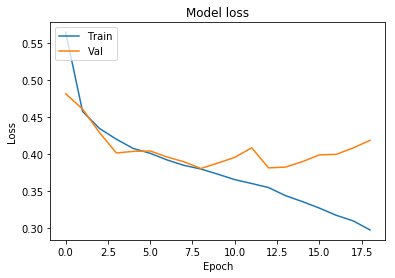

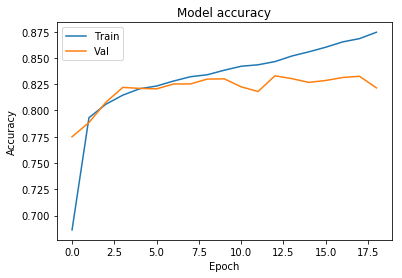

Loss = 0.413406
Accuracy: 0.824573
Precision: 0.771337
Recall: 0.806397
F1 score: 0.788477
Cohens kappa: 0.638750
ROC AUC: 0.898825
Confusion matrix:
[[10935  2130]
 [ 1725  7185]]


In [0]:
# Model 10b (without dropout)
model = Sequential()
model.add(Conv2D(16, (3, 3), padding='same', input_shape=(32,32,3)))
model.add(Activation('relu'))
model.add(Conv2D(16, (3, 3)))
model.add(Activation('relu'))
#model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
#model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

# adding last layers - flattening and Dence
model.add(Flatten())
model.add(Dense(512))
#model.add(BatchNormalization())
model.add(Activation('relu'))
#model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

## Compile model
model.compile(loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

# print model layers' info
print(model.summary())

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
reduce_lr = ReduceLROnPlateau(monitor='val_acc', mode='max', factor=0.2, patience=5, verbose=1, min_lr=0.001)
mc = ModelCheckpoint('best_model10b.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

# Train the model
m = model.fit(
    X_train,            # features (as dense inputs)
    y_train,            # labels
    epochs=500,         # number of epochs
    batch_size=128,     # define batch size
    verbose=1,          # the most extended verbose
    validation_data=(       
        X_val,          # the validation split that we did before
        y_val
    ),
    callbacks=[es, mc, reduce_lr]
    )

################################################################################
## Plot Loss & Accuracy Curves
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

################################################################################
# Demonstration of calculating metrics for a neural network model using sklearn
# predict probabilities for test set
yhat_probs = model.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = model.predict_classes(X_test, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]

# evaluate model
Loss,_ = model.evaluate(X_test, y_test, verbose=0)
print('Loss = %.6f' % Loss)
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print('Confusion matrix:')
print(matrix)

W0830 15:59:30.084102 140004494276480 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:2041: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
activation_10 (Activation)   (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 30, 30, 16)        2320      
_________________________________________________________________
activation_11 (Activation)   (None, 30, 30, 16)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 16)        64        
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 30, 30, 32)        4640      
_________________________________________________________________
activation_12 (Activation)   (None, 30, 30, 32)       

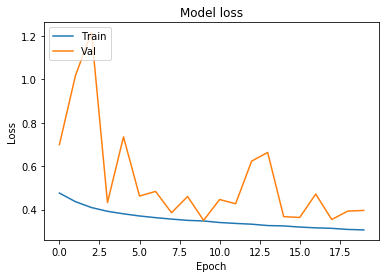

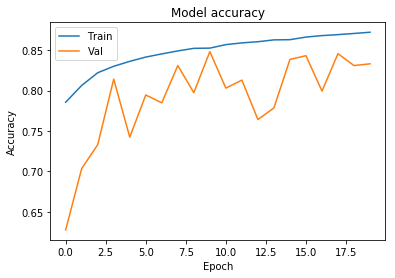

Loss = 0.391840
Accuracy: 0.835586
Precision: 0.875727
Recall: 0.692817
F1 score: 0.773607
Cohens kappa: 0.647265
ROC AUC: 0.900904
Confusion matrix:
[[12189   876]
 [ 2737  6173]]


In [5]:
# Model 10c (with batch normalization)
model = Sequential()
model.add(Conv2D(16, (3, 3), padding='same', input_shape=(32,32,3)))
model.add(Activation('relu'))
model.add(Conv2D(16, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# adding last layers - flattening and Dence
model.add(Flatten())
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

## Compile model
model.compile(loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

# print model layers' info
print(model.summary())

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
reduce_lr = ReduceLROnPlateau(monitor='val_acc', mode='max', factor=0.2, patience=5, verbose=1, min_lr=0.001)
mc = ModelCheckpoint('best_model10c.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

# Train the model
m = model.fit(
    X_train,            # features (as dense inputs)
    y_train,            # labels
    epochs=500,         # number of epochs
    batch_size=32,      # define batch size
    verbose=1,          # the most extended verbose
    validation_data=(       
        X_val,          # the validation split that we did before
        y_val
    ),
    callbacks=[es, mc, reduce_lr]
    )

################################################################################
## Plot Loss & Accuracy Curves
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

################################################################################
# Demonstration of calculating metrics for a neural network model using sklearn
# predict probabilities for test set
yhat_probs = model.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = model.predict_classes(X_test, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]

# evaluate model
Loss,_ = model.evaluate(X_test, y_test, verbose=0)
print('Loss = %.6f' % Loss)
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print('Confusion matrix:')
print(matrix)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
activation_19 (Activation)   (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 30, 30, 16)        2320      
_________________________________________________________________
activation_20 (Activation)   (None, 30, 30, 16)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 30, 30, 32)        4640      
_________________________________________________________________
activation_21 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 28, 28, 32)       

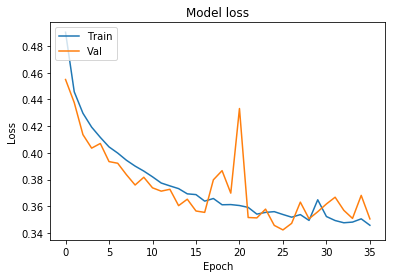

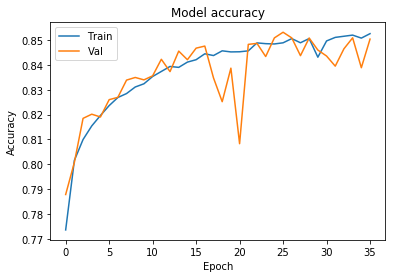

Loss = 0.349168
Accuracy: 0.848373
Precision: 0.851259
Recall: 0.758586
F1 score: 0.802255
Cohens kappa: 0.679963
ROC AUC: 0.918605
Confusion matrix:
[[11884  1181]
 [ 2151  6759]]


In [6]:
# Model 10d (without batch normalization and with greater batch size)
model = Sequential()
model.add(Conv2D(16, (3, 3), padding='same', input_shape=(32,32,3)))
model.add(Activation('relu'))
model.add(Conv2D(16, (3, 3)))
model.add(Activation('relu'))
#model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
#model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# adding last layers - flattening and Dence
model.add(Flatten())
model.add(Dense(512))
#model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

## Compile model
model.compile(loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

# print model layers' info
print(model.summary())

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
reduce_lr = ReduceLROnPlateau(monitor='val_acc', mode='max', factor=0.2, patience=5, verbose=1, min_lr=0.001)
mc = ModelCheckpoint('best_model10d.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

# Train the model
m = model.fit(
    X_train,            # features (as dense inputs)
    y_train,            # labels
    epochs=500,         # number of epochs
    batch_size=64,     # define batch size
    verbose=1,          # the most extended verbose
    validation_data=(       
        X_val,          # the validation split that we did before
        y_val
    ),
    callbacks=[es, mc, reduce_lr]
    )

################################################################################
## Plot Loss & Accuracy Curves
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

################################################################################
# Demonstration of calculating metrics for a neural network model using sklearn
# predict probabilities for test set
yhat_probs = model.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = model.predict_classes(X_test, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]

# evaluate model
Loss,_ = model.evaluate(X_test, y_test, verbose=0)
print('Loss = %.6f' % Loss)
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print('Confusion matrix:')
print(matrix)


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
activation_28 (Activation)   (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 30, 30, 16)        2320      
_________________________________________________________________
activation_29 (Activation)   (None, 30, 30, 16)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 30, 30, 32)        4640      
_________________________________________________________________
activation_30 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 28, 28, 32)       

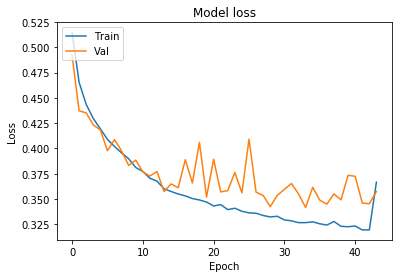

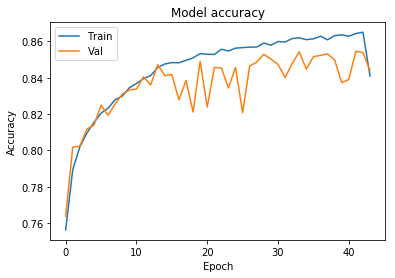

Loss = 0.355869
Accuracy: 0.843413
Precision: 0.796294
Recall: 0.824804
F1 score: 0.810298
Cohens kappa: 0.677053
ROC AUC: 0.919964
Confusion matrix:
[[11185  1880]
 [ 1561  7349]]


In [7]:
# Model 11
model = Sequential()
model.add(Conv2D(16, (3, 3), padding='same', input_shape=(32,32,3)))
model.add(Activation('relu'))
model.add(Conv2D(16, (3, 3)))
model.add(Activation('relu'))
#model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
#model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# adding last layers - flattening and Dence
model.add(Flatten())
model.add(Dense(512))
#model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

## Compile model
model.compile(loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

# print model layers' info
print(model.summary())

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
reduce_lr = ReduceLROnPlateau(monitor='val_acc', mode='max', factor=0.2, patience=5, verbose=1, min_lr=0.001)
mc = ModelCheckpoint('best_model11.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

# Train the model
m = model.fit(
    X_train,            # features (as dense inputs)
    y_train,            # labels
    epochs=500,         # number of epochs
    batch_size=128,     # define batch size
    verbose=1,          # the most extended verbose
    validation_data=(       
        X_val,          # the validation split that we did before
        y_val
    ),
    callbacks=[es, mc, reduce_lr]
    )

################################################################################
## Plot Loss & Accuracy Curves
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

################################################################################
# Demonstration of calculating metrics for a neural network model using sklearn
# predict probabilities for test set
yhat_probs = model.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = model.predict_classes(X_test, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]

# evaluate model
Loss,_ = model.evaluate(X_test, y_test, verbose=0)
print('Loss = %.6f' % Loss)
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print('Confusion matrix:')
print(matrix)